Представьте, что у нас небольшой магазин, туда приходят покупатели, делают покупки и мы можем посчитать их средний чек за день. Также допустим у нас покупатели закупаются раз в 10 дней из-за выгодных предложений. У нас есть исторические данные - user_id, metric, day. metric - cредний чек покупателя, user_id - айдишник покупателя, day - день в прошлом месяце. У нас 10к покупателей, которые были у нас в магазине 2 раза. Мы построили модель, повышающую средний чек у покупателей, и теперь хотим проверить, как она работает. Для этого нам надо правильно спланировать А/Б тест. Данные - 'df_hw.csv'.

Задание:

1) Подобрать дизайн корректного А/Б теста на исторических данных

2) Можно ли статистически значимо задетектить эффект в 2% 

3) За какую длительность теста?

4) Как сделать так чтобы хватало 3 дней на тест?

In [29]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd
#import seaborn as sns
from sklearn.utils import shuffle

In [30]:
df_all = pd.read_csv('df_hw.csv', index_col = 0)

In [31]:
df_all.head()

,user_id,metric,day
4768,4768,5210.050500,8
1928,1928,1617.534800,8
2995,2995,6742.954000,5
15885,5885,8998.112105,15
6121,6121,2281.206200,1


In [32]:
metric_train = df_all[df_all['day'] < 10].sort_values(by = ['user_id', 'day'])['metric'].values
metric_valid = df_all[df_all['day'] >= 10].sort_values(by = ['user_id', 'day'])['metric'].values

In [33]:
inds = [i for i in range(len(metric_train))]

In [34]:
def plot_hist(x):
    plt.figure(figsize=(7,7))
    plt.hist(x, bins = 100, color='red',  linewidth=2)
    plt.title('Гистограмма средней денежной метрики')
    plt.ylabel('Количество')
    plt.show()

In [35]:
metric_all = metric_train + metric_valid

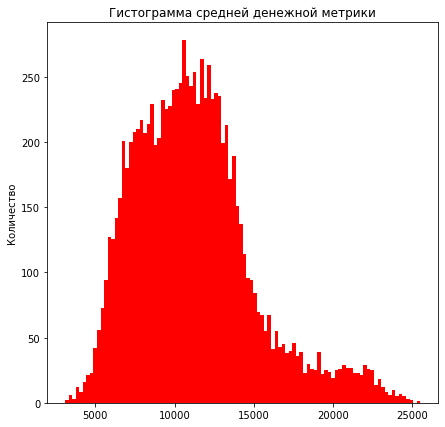

In [36]:
plot_hist(metric_all)

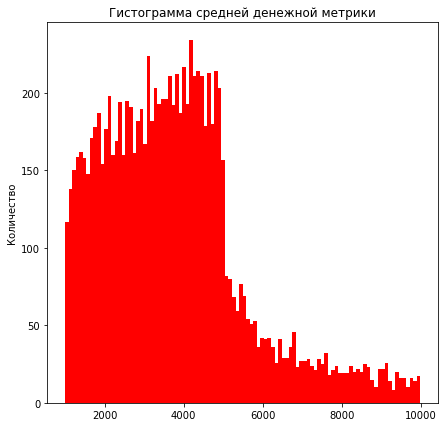

In [37]:
plot_hist(metric_train)

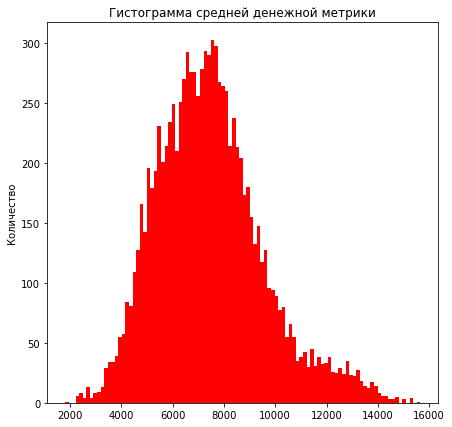

In [38]:
plot_hist(metric_valid)

In [39]:
iters = 1000
p_value = []
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    p = scipy.stats.ttest_ind(valid_A, valid_B).pvalue
    p_value.append(p)

0.052

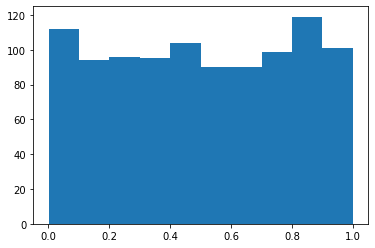

In [41]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [42]:
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.025094636836609174, pvalue=0.5461452678725042)

In [43]:
np.mean(metric_valid) 

7456.122470084464

In [44]:
np.std(metric_valid)

2088.205946758756

In [45]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    valid_A = valid_A * effect
    p = scipy.stats.ttest_ind(valid_A, valid_B ).pvalue
    p_value.append(p)

0.949

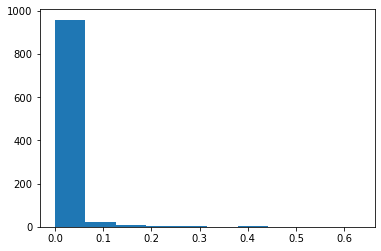

In [46]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [47]:
metric_train = df_all[df_all['day'].isin([7,8,9])].sort_values(by = ['user_id', 'day'])['metric'].values
metric_valid = df_all[df_all['day'].isin([17,18,19])].sort_values(by = ['user_id', 'day'])['metric'].values

In [48]:
inds = [i for i in range(len(metric_train))]

In [49]:
len(inds)

3000

In [50]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(inds) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    p = scipy.stats.ttest_ind(valid_A, valid_B ).pvalue
    p_value.append(p)

0.057

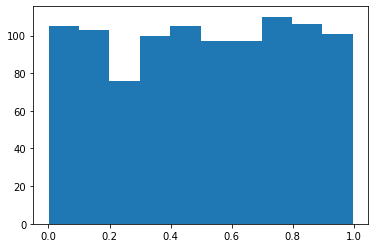

In [51]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [52]:
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.02055250847192247, pvalue=0.7840632732123862)

In [55]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(inds) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    valid_A = valid_A * effect
    #p = scipy.stats.mannwhitneyu(valid_A_c, valid_B_c ,alternative='two-sided').pvalue
    p = scipy.stats.ttest_ind(valid_A, valid_B).pvalue
    p_value.append(p)

0.524

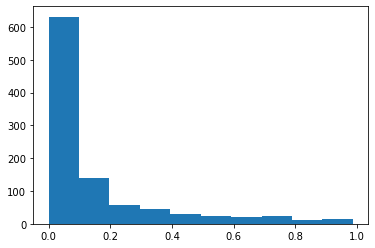

In [56]:
p_value = np.array(p_value)
plt.hist(p_value)
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [57]:
mean_cov = np.mean(metric_train)
var_cov = np.var(metric_train)
covariance = np.cov(metric_valid, metric_train)[0][1]
theta = covariance / var_cov

In [65]:
train_A[:10]

array([2143.6574, 5724.3381, 1102.7469, 3546.774 , 2917.7177, 4004.8025,
       4659.5462, 1226.3854, 2888.3114, 1276.0262])

In [68]:
np.std(valid_A[:10])

1474.3322214568107

In [69]:
np.std(valid_A_c[:10])

921.0060376432112

In [64]:
metric_valid.shape

(3000,)

In [58]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    #p_k2s = scipy.stats.ks_2samp(train_A, train_B).pvalue
    valid_A = valid_A * effect
    valid_A_c = valid_A - (train_A - mean_cov) * theta
    valid_B_c = valid_B - (train_B - mean_cov) * theta
    #p = scipy.stats.mannwhitneyu(valid_A_c, valid_B_c ,alternative='two-sided').pvalue
    p = scipy.stats.ttest_ind(valid_A_c, valid_B_c).pvalue
    p_value.append(p)

0.98

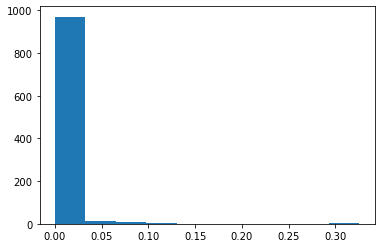

In [60]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

Y_predict ~ X * theta [+ X1 * theta2 + X2 * theta, CUPAC, build model linear/NN/boostig, SCORING]
Y_real - Y_predict

+ POSTstratification + rank_transformation